In [1]:
import random

# Error detection is already helpful on the IBM 5Q chip

###### Contributor : 
Christophe Vuillot
###### Affiliations :
JARA Institute for Quantum Information, RWTH Aachen university

### Introduction

This notebook reproduce the results of the paper "Error detection is already helpful on the IBM 5Q chip" (insert link to paper here) from the raw data produced by the IBM 5Q chip between March 10th and 23rd stored in the file RawDatafromPaper.py.

The idea is to compare some bare circuits on two qubits with their encoded version in the [[4,2,2]] code.
The chosen circuits are ones that have some fault-tolerant implementation in the [[4,2,2]] code.
In practice, not all are completely fault-tolerant due to the restricted connectivity of the IBM 5Q chip but close enough to show some improvement  !

One can prepare |00>, |0+> or |00>+|11> almost fault-tolerantly :
The preparation of |00> and |0+> can suffer an undetected X1.X2 error.

The gates X1, X2, Z1, Z2 (Pauli matrices), H1.H2.SWAP (two Hadamards and a SWAP) and CZ (controlled phase) can be done fault tolerantly.

More detailed information can be found at https://arxiv.org/abs/1610.03507, and 'insert my paper here'.

### Preparing the circuits
In order to fairly compare the encoded implementation to the bare implementation, one has to chose the best two qubits to represent the bare version. The possible pairs are listed below, chose the one with the lowest error rates at the time of doing the experiement.
For this specific experiement the qubits 0 and 2 were chosen

In [2]:
cp = [0,2]

The file Experiment_tools.py contains one function creating all the qasm code circuits depending on the chosen qubits for the bare version.
This also provides informations about the circuits useful to analyze the results.

In [3]:
# Creating the circuits with misc info
from Experiment_tools import *
all_circuits = create_all_circuits(cp)

# Printing summary
template = "{input_state:9}\t|\t{circuit_desc:12}"
print('Summary of the circuits that will be tested :\n')
print(template.format(circuit_desc="Gate sequence", input_state="input state"))
print('--------------------------------------')
for rec in all_circuits: 
    print(template.format(**rec))

# Creating job batches to be run 
qasm_batch_bare = [{'qasm':c['qasm_bare']} for c in all_circuits]
qasm_batch_encoded = [{'qasm':c['qasm_encoded']} for c in all_circuits]

Summary of the circuits that will be tested :

input state	|	Gate sequence
--------------------------------------
|00>     	|	X1 HHS CZ X2
|00>     	|	HHS Z1 CZ   
|00>     	|	HHS Z1 Z2   
|00>     	|	HHS Z2 CZ   
|00>+|11>	|	Z2 X2       
|0+>     	|	X1 Z2       
|00>     	|	HHS Z1      
|00>     	|	HHS CZ      
|00>     	|	X1 X2       
|00>     	|	HHS Z2      
|00>+|11>	|	X1          
|0+>     	|	X1          
|00>     	|	HHS         
|00>+|11>	|	Z2          
|0+>     	|	Z2          
|00>     	|	X1          
|00>     	|	X2          
|00>+|11>	|	            
|0+>     	|	            
|00>     	|	            


### Loading the experiments
The experiments have been stored in the file RawDatafromPaper.py, they are loaded here for analysis.

In [4]:
from RawDatafromPaper import raw_results_bare, raw_results_encoded

results_bare_list = raw_results_bare

cps = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

results_encoded_list = raw_results_encoded


### Analysing the results
For each individual circuit and run we analyse the output distribution and can compare it to the expected one.

In [5]:
analysed_bare = []
analysed_encoded = []

for j, res in enumerate(results_bare_list):
    analysed_bare.append([])
    for k in range(0,20):
        analysed_bare[j].append(analysis_one_bare_expe(res['qasms'][k],all_circuits[k],cp))

for j, res in enumerate(results_encoded_list):
    analysed_encoded.append([])
    for k in range(0,20):
        analysed_encoded[j].append(analysis_one_encoded_expe(res['qasms'][k],all_circuits[k]))

### Some specific circuit examples
First look at the circuit preparing the computational basis states : |00>, X1 |00>, X2 |00> and X1 X2 |00> :

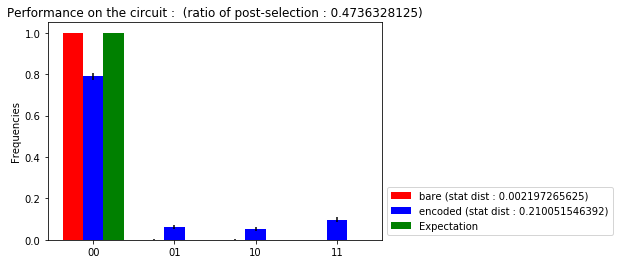

In [6]:
plot_one_expe(analysed_bare[random.randrange(len(analysed_bare))][19],analysed_encoded[random.randrange(len(analysed_encoded))][19],0.99)

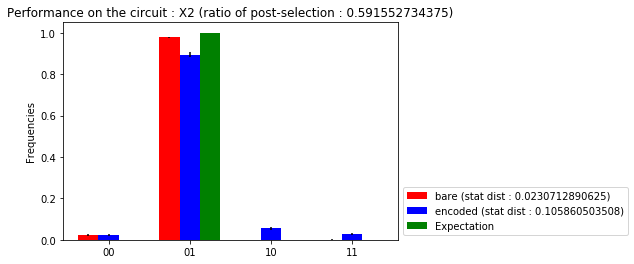

In [7]:
plot_one_expe(analysed_bare[random.randrange(len(analysed_bare))][16],analysed_encoded[random.randrange(len(analysed_encoded))][16],0.99)

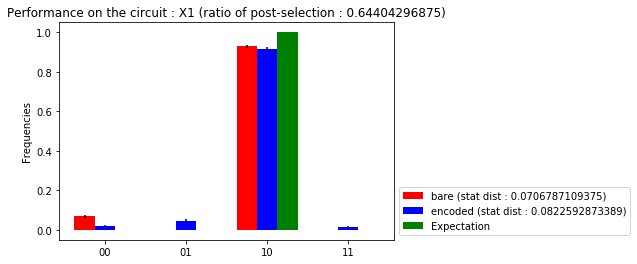

In [8]:
plot_one_expe(analysed_bare[random.randrange(len(analysed_bare))][15],analysed_encoded[random.randrange(len(analysed_encoded))][15],0.99)

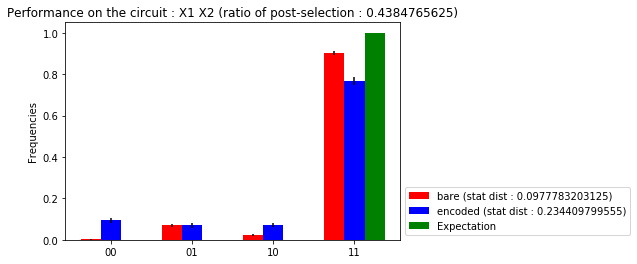

In [9]:
plot_one_expe(analysed_bare[random.randrange(len(analysed_bare))][8],analysed_encoded[random.randrange(len(analysed_encoded))][8],0.99)

We can see the bare version performs better even if it exhibits some qubit decay errors, and the predominant error for the encoded version is the flip of both bits, so X1 X2. This reflect the fact that the preparation circuit for |00> is not tolerant to those errors.

Now look at the circuits : H H SWAP |00> and X2 CZ H H SWAP X1 |00>

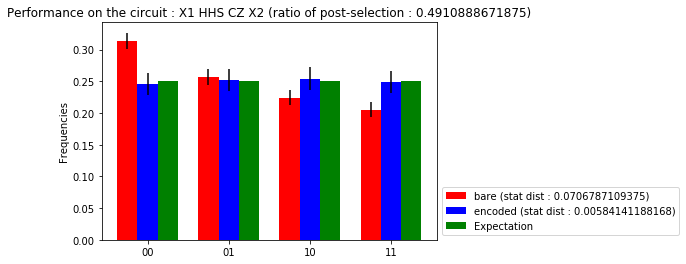

In [10]:
plot_one_expe(analysed_bare[random.randrange(len(analysed_bare))][0],analysed_encoded[random.randrange(len(analysed_bare))][0],0.99)

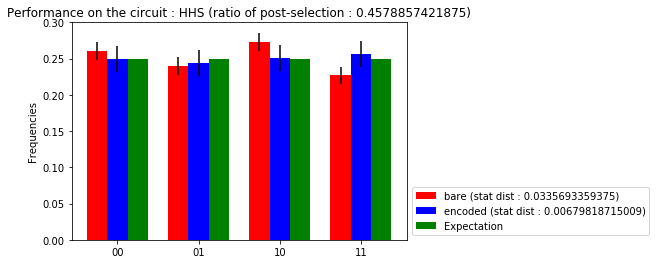

In [11]:
plot_one_expe(analysed_bare[random.randrange(len(analysed_bare))][12],analysed_encoded[random.randrange(len(analysed_bare))][12],0.99)

The encoded version is much more evenly distributed whereas the bare version suffers from qubit decay once again.

### Computing average performances for each circuit
We now look at the average performances over all runs for each circuit, comparing the statistical distance of the observed output distribution to the expected one.
We show the difference between the statistical distance of the encoded version minus the bare version.

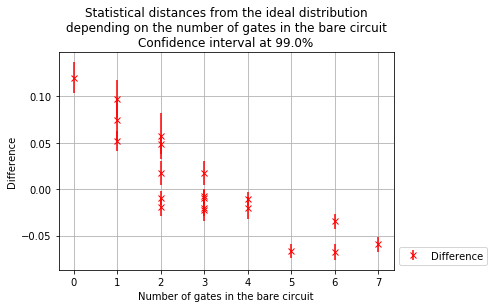

In [12]:
all_expe = analyse_all_expe(analysed_bare, analysed_encoded, .99)
plot_stat_dist(all_expe)

### Classifying circuits
Finally we can classify the circuits depending on if the encoding actually improve the performances.

### Circuits better encoded

In [13]:
print('Circuit that are improved when encoded : ')
print('-----------------------------------------')
template = "{input_state:9}\t|\t{circuit_desc:12}"
print(template.format(circuit_desc="Gate sequence", input_state="input state"))
print('--------------------------------------')
for rec in [c for c in all_expe if c['bare_mean_stat_dist']>c['encoded_mean_stat_dist']]: 
    print(template.format(**rec))

Circuit that are improved when encoded : 
-----------------------------------------
input state	|	Gate sequence
--------------------------------------
|00>     	|	X1 HHS CZ X2
|00>     	|	HHS Z1 CZ   
|00>     	|	HHS Z1 Z2   
|00>     	|	HHS Z2 CZ   
|00>+|11>	|	Z2 X2       
|00>     	|	HHS Z1      
|00>     	|	HHS CZ      
|00>     	|	HHS Z2      
|00>+|11>	|	X1          
|00>     	|	HHS         
|00>+|11>	|	Z2          
|00>+|11>	|	            


### Circuits better bare

In [14]:
print('\n\nCircuit that are better off performed bare : ')
print('--------------------------------------------')
template = "{input_state:9}\t|\t{circuit_desc:12}"
print(template.format(circuit_desc="Gate sequence", input_state="input state"))
print('--------------------------------------')
for rec in [c for c in all_expe if c['bare_mean_stat_dist']<c['encoded_mean_stat_dist']]: 
    print(template.format(**rec))



Circuit that are better off performed bare : 
--------------------------------------------
input state	|	Gate sequence
--------------------------------------
|0+>     	|	X1 Z2       
|00>     	|	X1 X2       
|0+>     	|	X1          
|0+>     	|	Z2          
|00>     	|	X1          
|00>     	|	X2          
|0+>     	|	            
|00>     	|	            


We can see that the fault-tolerant circuits or the states whose output distribution is unchanged by the eventual X1.X2 errors perform better encoded.